<a href="https://colab.research.google.com/github/Neerajraja10/neeraj-raja-DSMT/blob/main/Neeraj_Raja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats
from scipy.stats import *

In [ ]:
nRowsRead = None # specify 'None' if want to read whole file
#Load file
df = pd.read_csv('C:\\DS\\googleplaystore.csv', delimiter=',', nrows = nRowsRead)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.isnull().sum() # Checking if the data set has any Null value of missing Values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# No Independent variable has missing Data
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes # Checking Data type code
    temp['null_count'] = df.isnull().sum() # Null Count check code
    temp['unique_count'] = df.nunique() 
    # Checking if there are any unique counts in the Cloumn eg. there are 9660 different applications in the App store
    return temp

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [ ]:
df['Type'].fillna("Free", inplace = True) # Data Cleaning or replacing NaN in the Type column with Free using Fillna

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


In [ ]:
df.dropna(subset = ['Content Rating'], inplace=True) # We have dropped 10472 row as it had NaN in Content rating

In [ ]:
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True) # Dropping Cloumn as the Data is un supervised and Random and Not of much use for Predicting or Analysing

In [ ]:
modeValueRating = df['Rating'].mode() # Checking the mode

In [ ]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True) # Rplacing NaN in rating Column

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
df['Reviews'] = df.Reviews.astype(int)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
# Data cleaning is done for Size Column so that it can be used for Analysis.
df['Size'] = df.Size.apply(lambda x: x.strip('+'))# Removed the + Sign

In [ ]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))# removed the `,`

In [ ]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))# converting the M to Mega

In [ ]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))# converting the K to Kilo

In [ ]:
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [ ]:
df['Size'] = pd.to_numeric(df['Size']) # Converting the string to Numeric type

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [ ]:

df.dropna(subset = ['Size'], inplace=True)

In [ ]:
# Data cleaning is done for Installs Column so that it can be used for Analysis.
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))

In [ ]:
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))

In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [ ]:
df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [ ]:
# We are checking the top Categories by indexing the counts and ploting it in Y - Axis. 
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

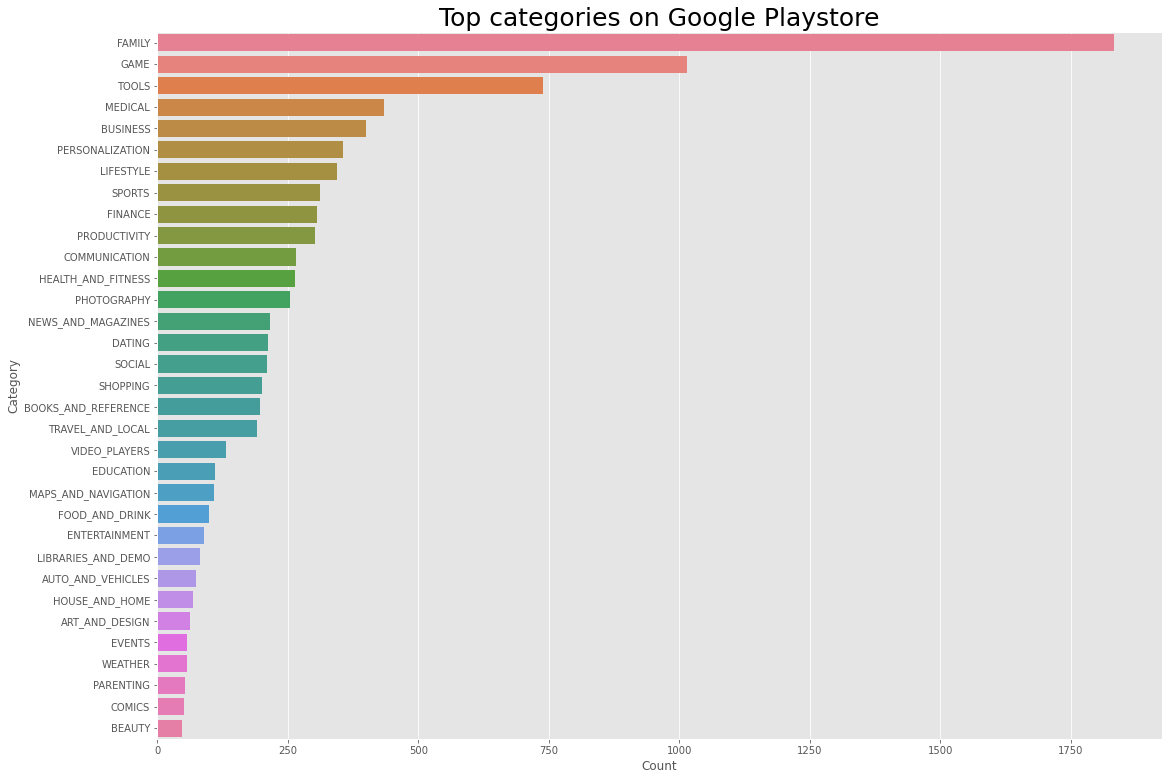

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Count") # Number of Counts in the Category on X Axis
plt.ylabel("Category")# Variety of Category on y Axis

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

# Family and Games category has highest number of Downloads we can see that from below Bar chart

<Figure size 1080x648 with 0 Axes>

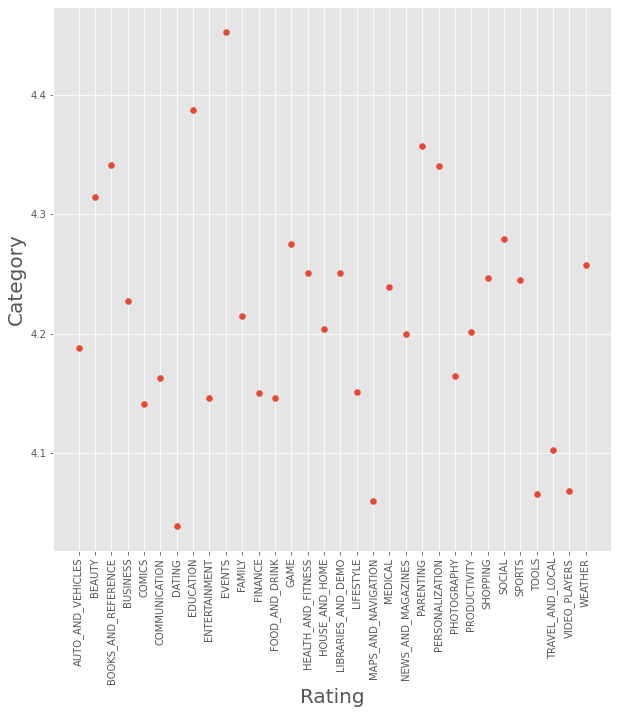

In [ ]:
# Knowing which Category has the highest Rating.
plt.figure(figsize=(15,9)) # Defining the size o fthe figure
fig, ax = plt.subplots()
ax.scatter(x = df.groupby('Category')['Rating'].mean()[1:].index, y = df.groupby('Category')['Rating'].mean()[1:].values)
plt.ylabel('Category', fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.xticks(rotation=90)
plt.show()

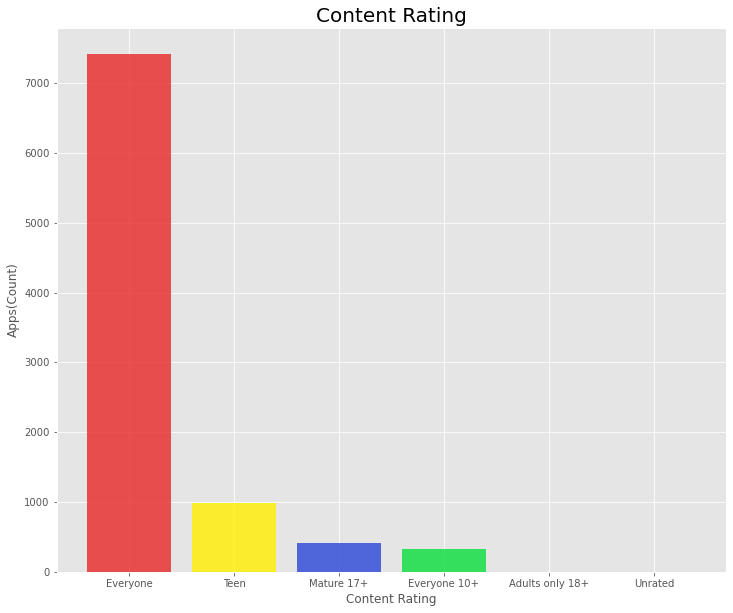

In [ ]:
# Checking which category Apps has highest Ratings. 
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])
    #Plotting chart for knowing which section of people have given highest number of count.
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#e72727','#FFF000','#2846d8','#07de3a','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

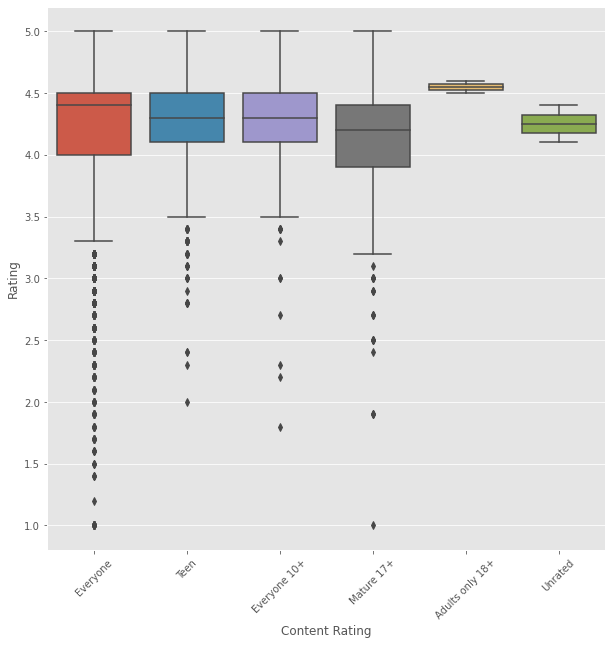

In [ ]:
#App Rating with Box Plot. Similar as above chart.
plt.figure(figsize= (10,10))
ax= sns.boxplot(x= "Content Rating",y= "Rating",data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

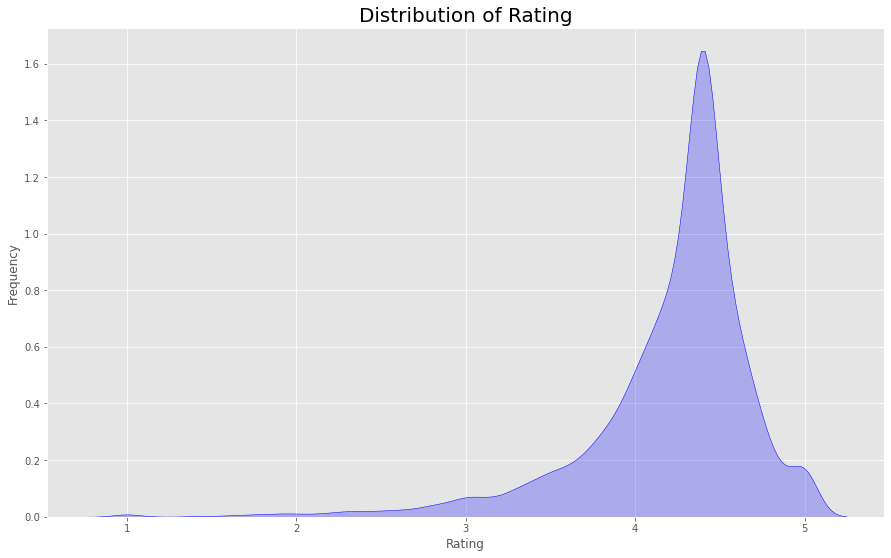

In [ ]:
# Distirbution of App Ratings across Appstore in Line Graph
# This is left skewed distribution.

plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

# Most simple but the most important chart showing Distribution of Ratings. Majority of the Ratings are in the range of 4 - 4.7. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


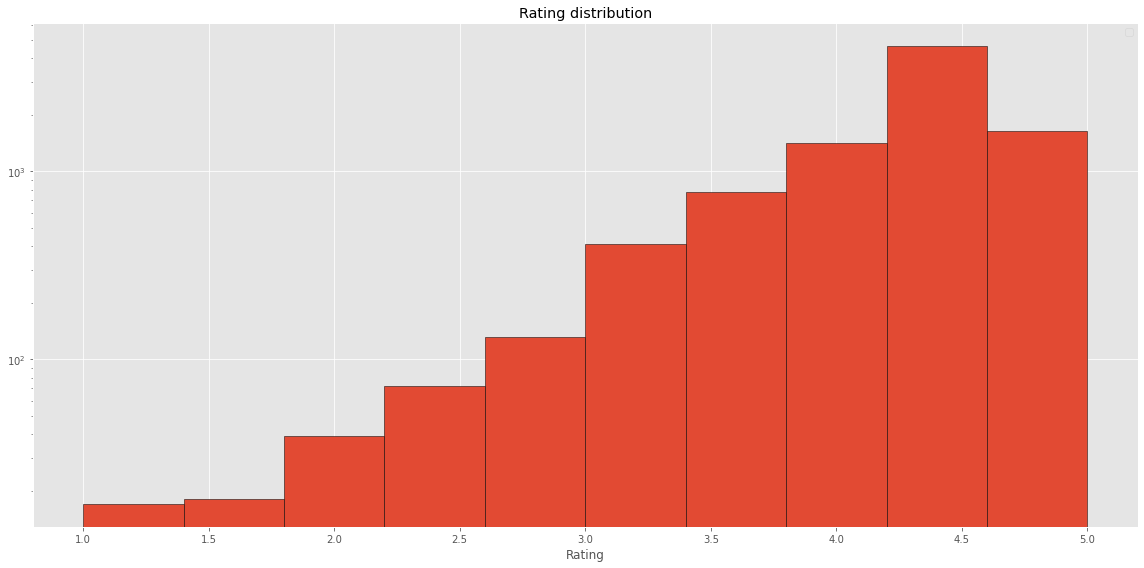

In [ ]:
# Similar as above but using Histogram.
# Distirbution of App Ratings across Appstore in Bar Chart
fig = plt.figure(figsize=(16,8)) 
plt.hist(df['Rating'],edgecolor = 'black', log=True)
plt.title("Rating distribution")
plt.xlabel('Rating')
plt.tight_layout()
plt.legend()

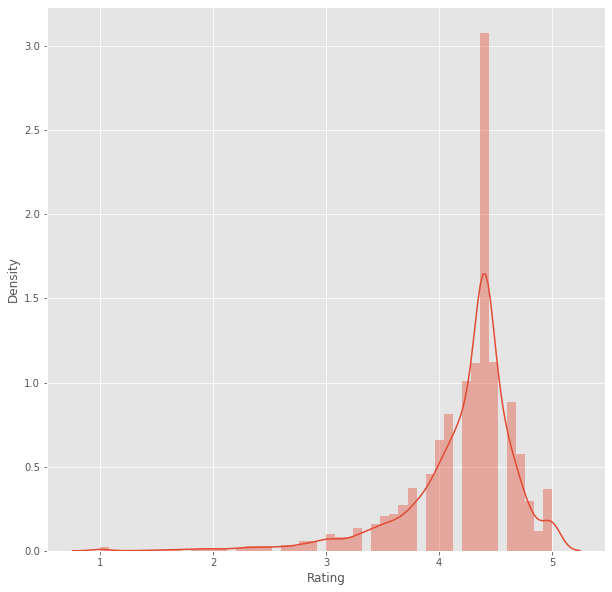

In [ ]:
sns.distplot(df['Rating']); # Histogram # Combining above 2 chart

In [ ]:
print("Skewness: %f" % df['Rating'].skew())
print("Kurtosis: %f" % df['Rating'].kurt())

Skewness: -2.023745
Kurtosis: 6.593593


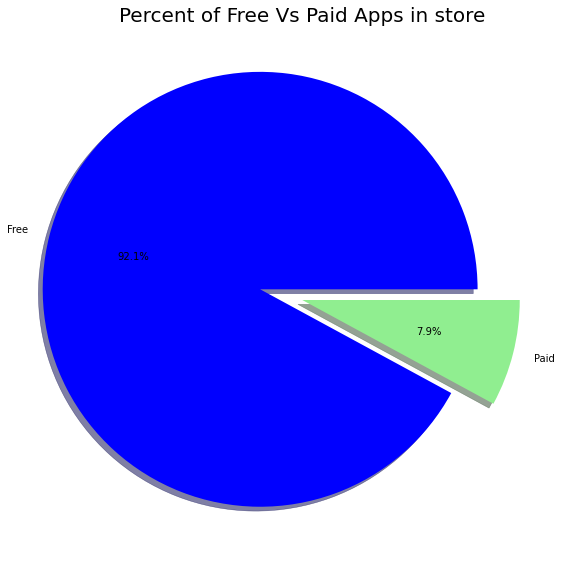

In [ ]:
#Pie chart for Percent of free vs Paid Apps in Store
plt.figure(figsize=(10,10)) # Increasing the size of the figure for better visibility
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

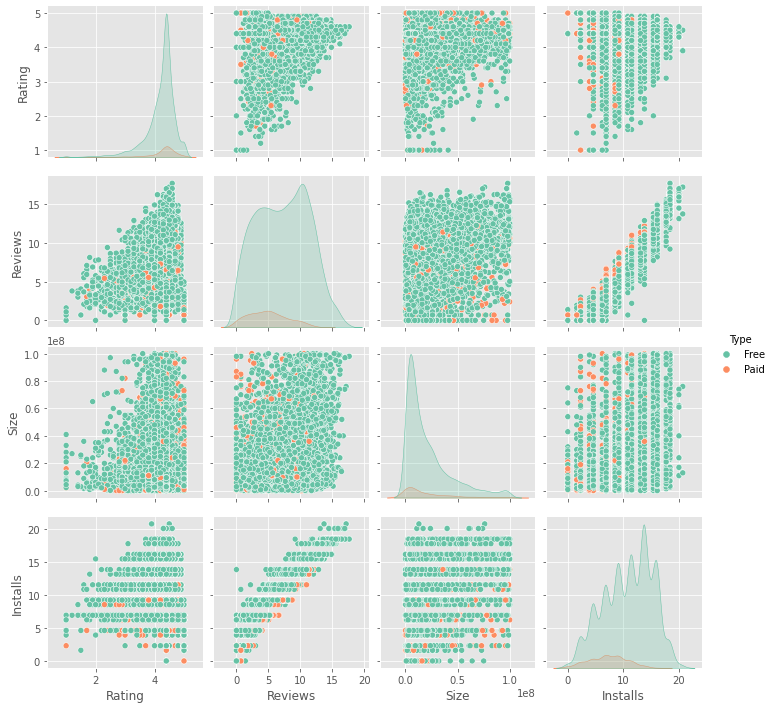

In [ ]:
# Some more Analysis on paid vs Free
Rating = df['Rating'] # Defining Variable
Size = df['Size']
Installs = df['Installs']
Reviews = df['Reviews']
Type = df['Type']
Price = df['Price']

plotgraph = sns.pairplot(pd.DataFrame(list(zip(Rating, np.log(Reviews), Size, np.log(Installs), Price, Type)), 
                        columns=['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Type']), hue='Type', palette="Set2") # Pair Plotting columns

Text(0.5, 1.0, 'Distribution of Reveiw')

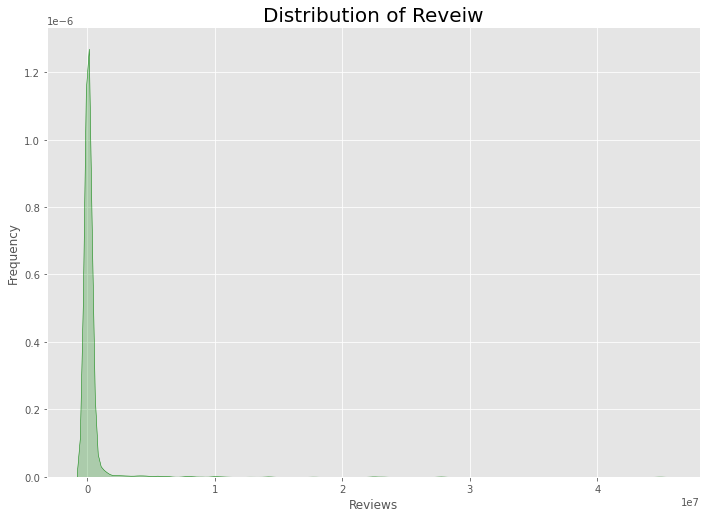

In [ ]:

# understanding corelation between number of reviews and Ratings.
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

# By this chart we can understand that Number of reviews are high when the rating is low. 
# Here Ratings is directly/Inversely dependent on the Reviews of the Application. 
# Lower the Rating if the Review and Higher. 

In [ ]:
df.Price=df.Price.str.replace("$","")
print(max(df[df['Type']=='Paid'].Price.values))
print(min(df[df['Type']=='Paid'].Price.values))
paid_filter=df[df['Type']=='Paid']

9.99
0.99


In [ ]:
paid_filter.Price=paid_filter.Price.astype(float) # Data Cleaning
paid_filter.Reviews=paid_filter.Reviews.astype(float) # Data Cleaning
paid_filter.groupby('Category')['Reviews'].sum().values # Adding Values of the in App purchases

array([2.166000e+03, 2.300000e+01, 1.672000e+03, 4.684800e+04,
       1.305300e+04, 6.300000e+01, 3.464500e+04, 3.771000e+03,
       0.000000e+00, 1.265549e+06, 2.319800e+04, 1.268000e+03,
       1.575940e+06, 2.124200e+04, 4.000000e+00, 3.668900e+04,
       9.580000e+02, 2.543300e+04, 2.010000e+02, 8.343000e+03,
       4.014040e+05, 1.932930e+05, 1.172300e+05, 4.840000e+02,
       2.420000e+02, 1.366690e+05, 9.093000e+04, 1.774000e+03,
       1.670000e+02, 5.983300e+04])

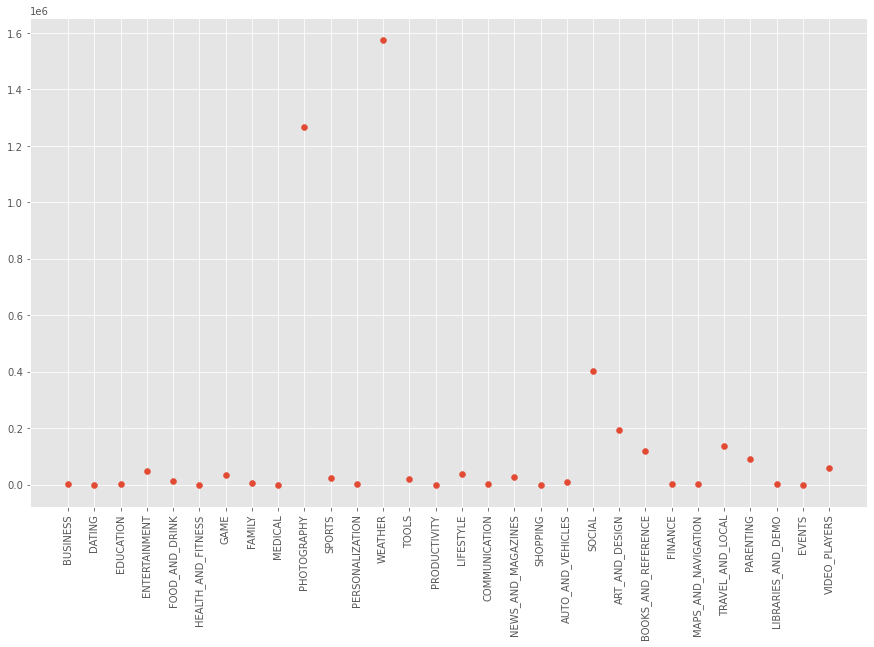

In [ ]:
# Understanding which catogory has highest number of reviews
plt.figure(figsize=(15,9)) # Increasing the size of the figure for better visibility
plt.scatter(x=paid_filter.Category.unique(),y=paid_filter.groupby('Category')['Reviews'].sum().values)
plt.xticks(rotation=90)
plt.show()


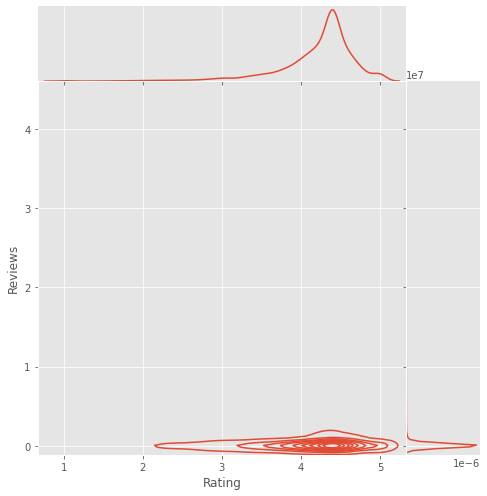

In [ ]:
# Showing the joint distribution using kernel density estimation
g = sns.jointplot(df.Rating,df.Reviews, kind="kde", height=7, space=0)
plt.show()

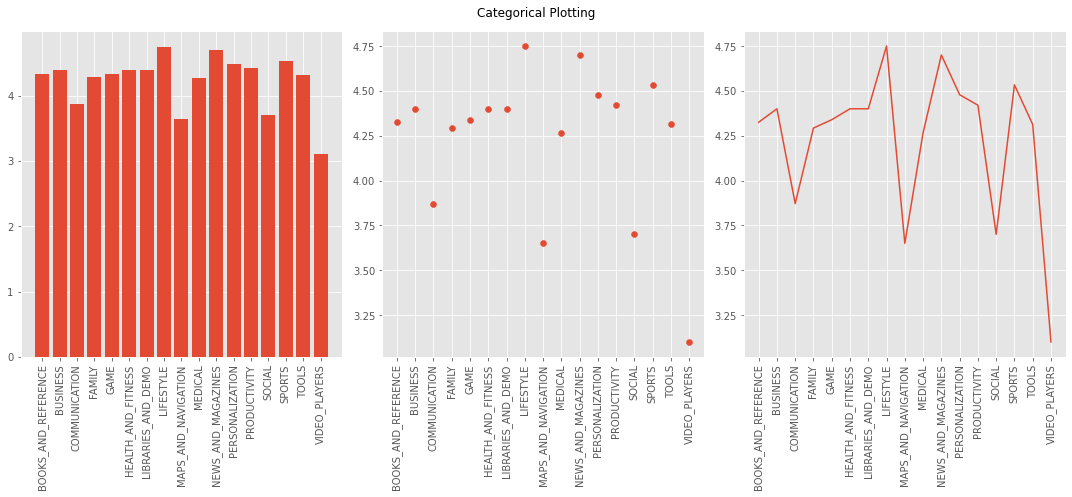

In [ ]:
df.Reviews=df.Reviews.astype(float)
s=paid_filter[paid_filter['Price']==0.99].Category.unique() 
# Plotting Reviews chart as per Categories

paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean()


plt.figure(1, figsize=(15, 7))

plt.subplot(131)
plt.bar(paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean().index, paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean().values)
plt.xticks(rotation=90) # Bar chart code
plt.subplot(132) # 
plt.scatter(paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean().index, paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean().values)
plt.xticks(rotation=90) # Scatter chart or point chart code
plt.subplot(133)
plt.plot(paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean().index, paid_filter[paid_filter['Price']==0.99].groupby('Category')['Rating'].mean().values)
plt.suptitle('Categorical Plotting')
plt.xticks(rotation=90) # Line chart code.
plt.tight_layout()
plt.show()

# All three charts represent same Data but in different Manner.

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600000.0,50000,Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19000000.0,50000,Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29000000.0,1000000,Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33000000.0,1000000,Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3100000.0,10000,Free,0,Everyone,Art & Design;Creativity


In [ ]:
df.info() # checkinf if the Data is Claean and shows no null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   float64
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
df.describe() # Checking Mean median and mode of the Data set.

,Rating,Reviews,Size,Installs
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09


In [ ]:
user_data = df.dropna()

In [ ]:
user_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0.0,9600000.0,10,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.4,3.0,9500000.0,1000,Free,0,Everyone,Medical


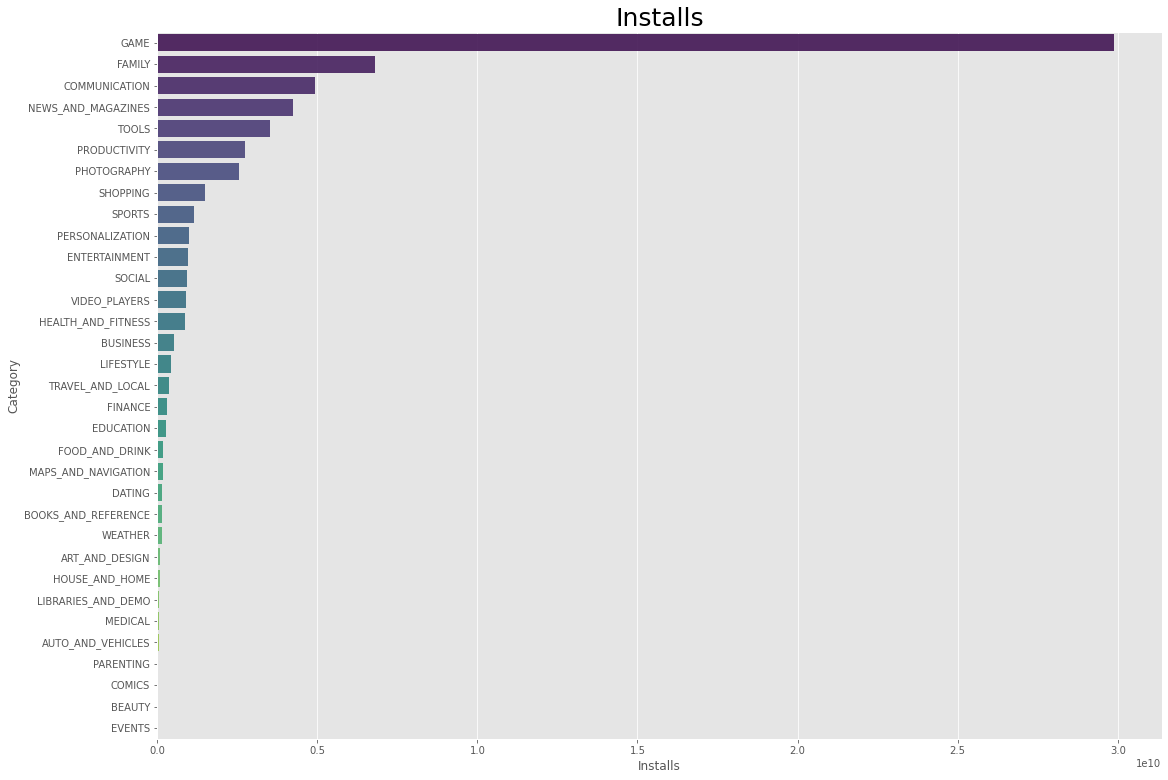

In [ ]:
# checking corr
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

In [ ]:
# We are doing detailed analysis of out top Catogory i.e. games
# Finding top 10 Games Section under sports
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');


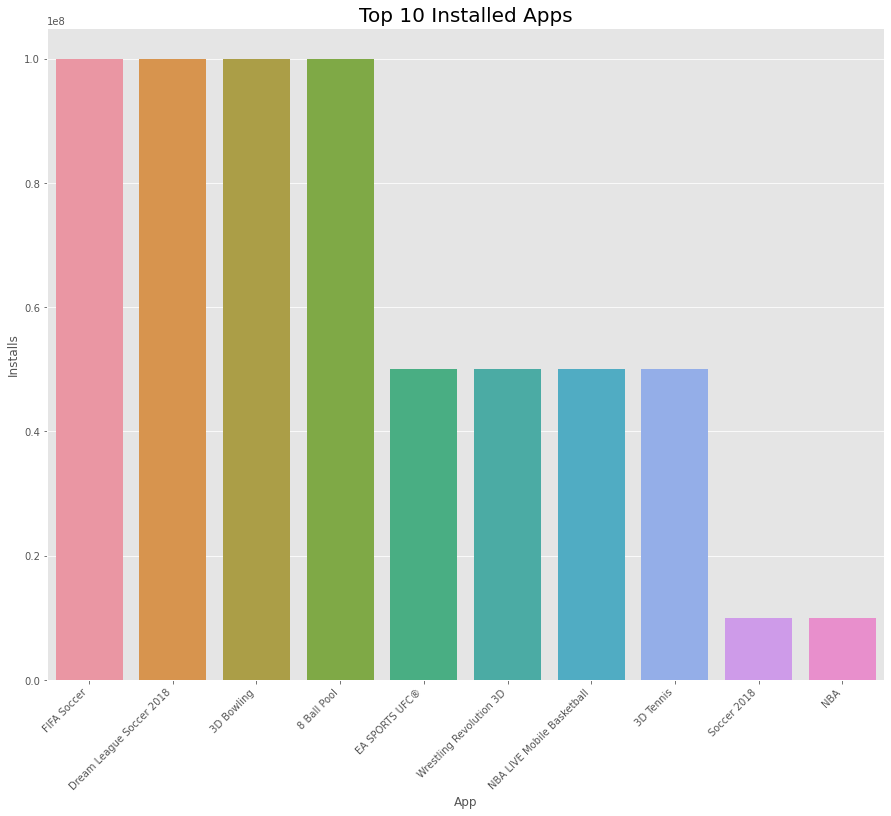

In [ ]:
findtop10incategory('Sports')

In [ ]:
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(20) # Knowing apps with highest review.
# This will be used below.

In [ ]:
# Ploting Graphs and finding Co-relation between Number of installs and App rating. 
# We can see App Installs are higher With 3.5 Rating and Above.

def num_plots(df, col, title, xlabel):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(xlabel, fontsize=16)
    plt.tight_layout()
    plt.show()
    df = df.rename(columns=str.lower)
    df.columns

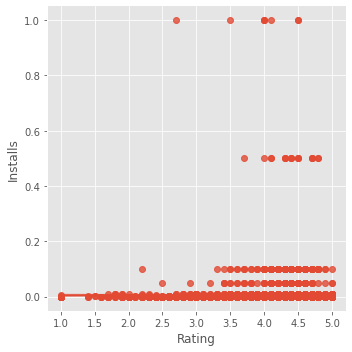

In [ ]:
sns.lmplot(x="Rating",y="Installs",data= df)

Text(0.5, 1.0, 'Count of app in each category')

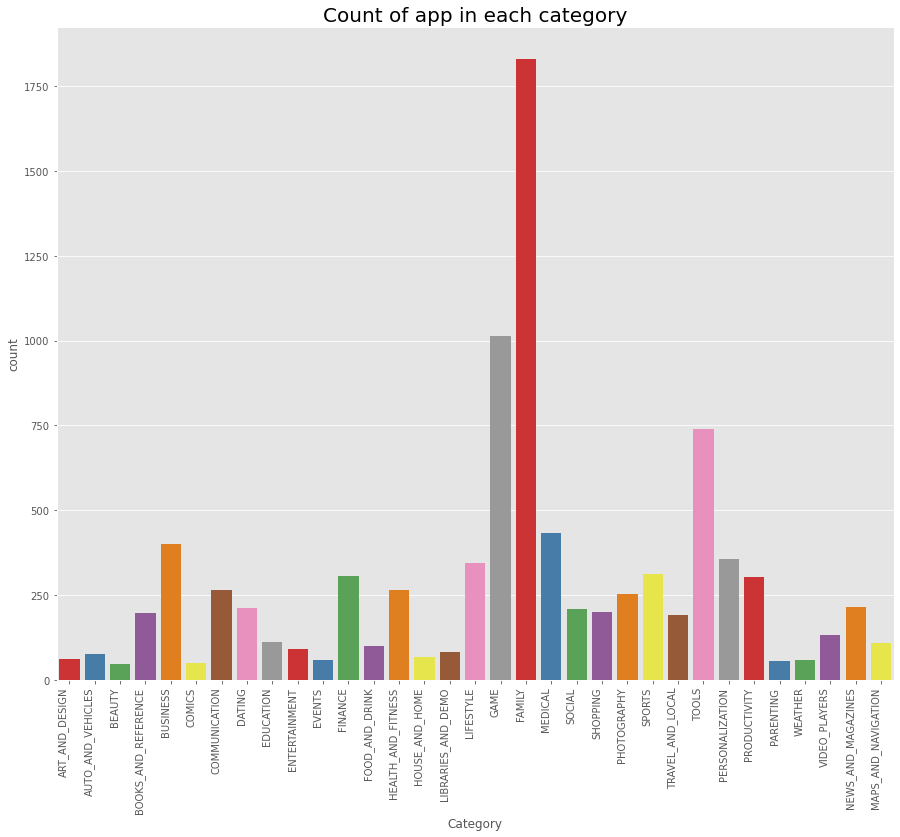

In [ ]:
plt.figure(figsize=(15,12))
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

In [ ]:
# Checking null Data before Ploting Q-Q Graph
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs          1568
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [ ]:
#Creating binary vaiables for Type of Apps (Free or paid)

data = pd.get_dummies(df[['Type']])

<Figure size 576x216 with 0 Axes>

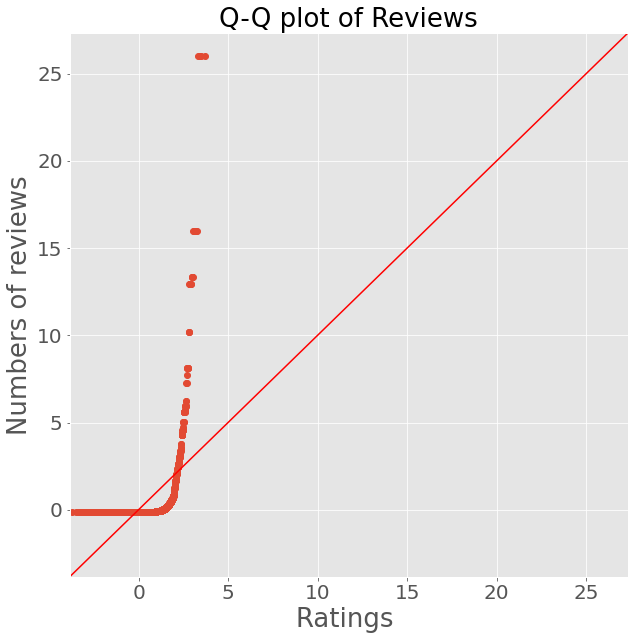

In [ ]:
# Plotting Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
data_norm = df[['Reviews',]]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,3))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel("Ratings ",fontsize=26)
  plt.ylabel("Numbers of reviews",fontsize=26)
  plt.title("Q-Q plot of {}".format(c),fontsize=26)
  plt.grid(True)
  plt.show()

# 

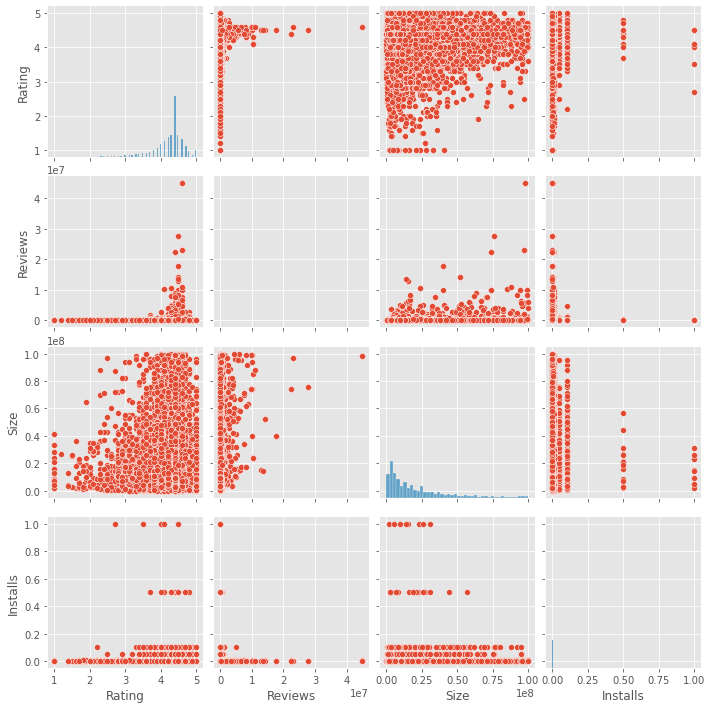

In [ ]:
# from the first Q-Q plot we can understand the corelation between Number of reviews and Ratings. 
sns.pairplot(df) 

<AxesSubplot:>

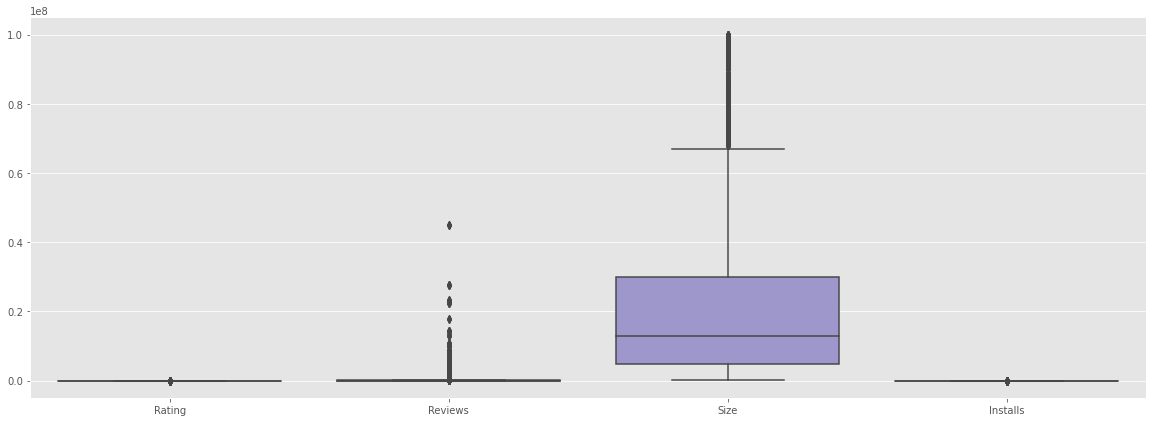

In [ ]:
# checking the Range of Dependent variable i.e. Installs vS Other Independent Variables.
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [ ]:
#Creating binary vaiables for Type of Apps (Free or paid)

data = pd.get_dummies(df[['Type']])

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = df[['Installs']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['Installs']] = pd.DataFrame(x_scaled)

In [ ]:
data.head()

,Type_Free,Type_Paid
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
# Putting in dummy values for Types and converting it in Numeric form.

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs
count,9145.000000,9.145000e+03,9.145000e+03,6125.000000
mean,4.208868,2.490487e+05,2.151653e+07,0.006246
std,0.507267,1.716211e+06,2.258875e+07,0.043744
min,1.000000,0.000000e+00,8.500000e+03,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,0.000001
50%,4.400000,7.420000e+02,1.300000e+07,0.000050
75%,4.500000,2.503700e+04,3.000000e+07,0.001000
max,5.000000,4.489389e+07,1.000000e+08,1.000000


In [ ]:
print( len(df['Category'].unique()) , "categories")

print("\n", df['Category'].unique())
# there are 33 Categories from which we have to choose how can use them to increase our Ratings.

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Boxplot of Rating VS Category')

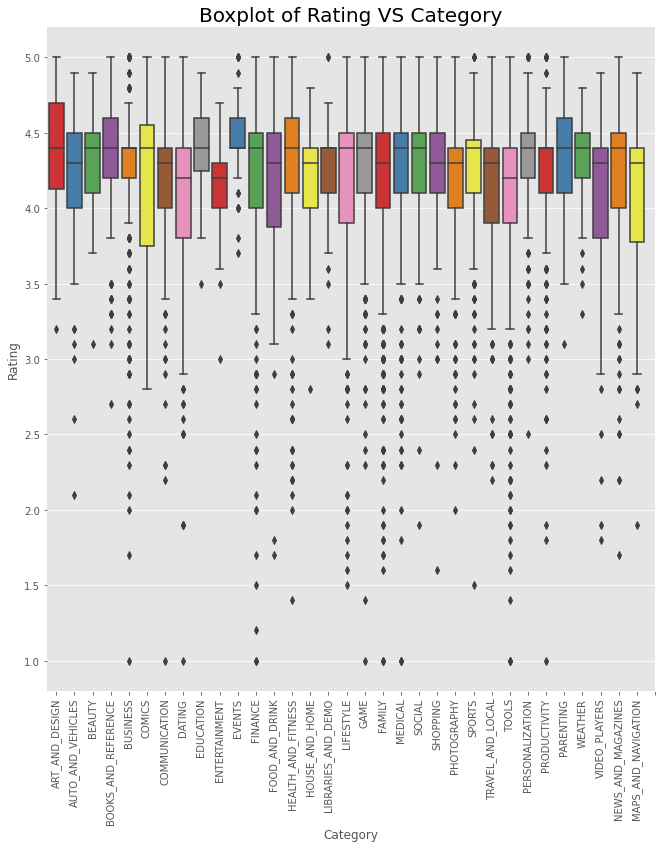

In [ ]:
# Box plotting of rating vs Category
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

# Finding from below chart is Ratings of application in each category is not different too much 

Text(0.5, 1.0, 'Rating VS Reveiws with Outlier')

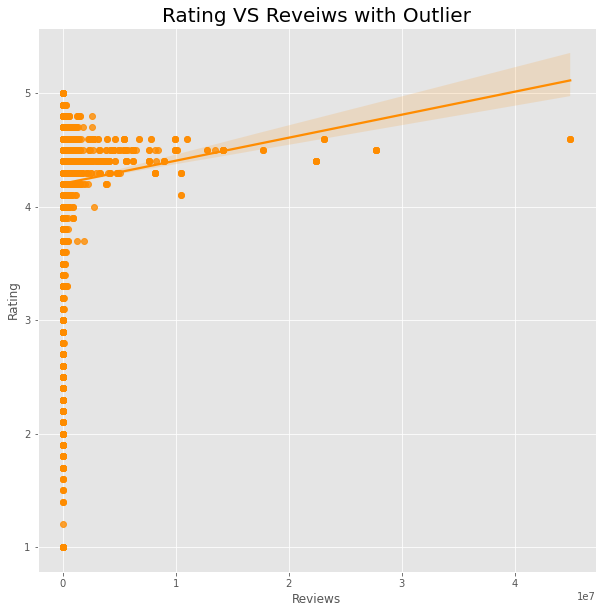

In [ ]:
# Plotting the chart with outliers i.e. Apps which has high number of reviews.

plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df); 
# Checking Rating vs reviews for less than million 
plt.title('Rating VS Reveiws with Outlier',size = 20)

# Findings from below chart Well-Known Application gets good ratings

Text(0.5, 1.0, 'Rating VS Reveiws without Outlier')

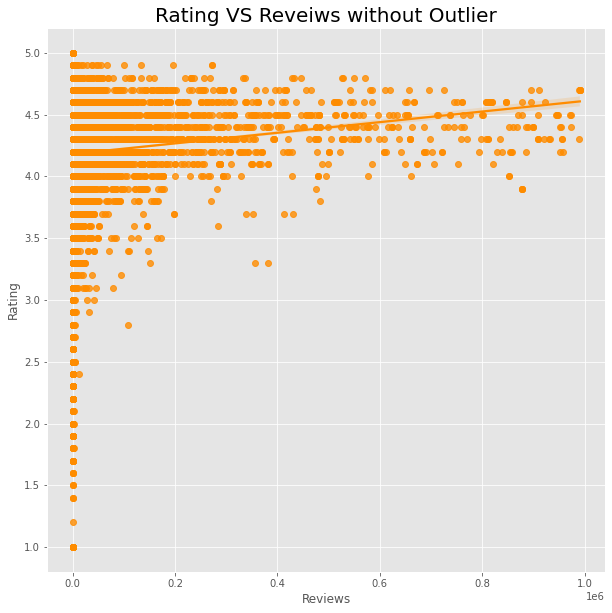

In [ ]:
# removing the Outlier for better graph understanding. Here the outliers are application above 1 million reviews. 
# We have removed the Apps which had more than a million number of reviews. Like Facebook, Instagram, Youtube and Amazon.

plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
# Checking Rating vs reviews for less than million 
plt.title('Rating VS Reveiws without Outlier',size = 20)

# Finding s from below chart Well-Known Application gets good ratings

<AxesSubplot:>

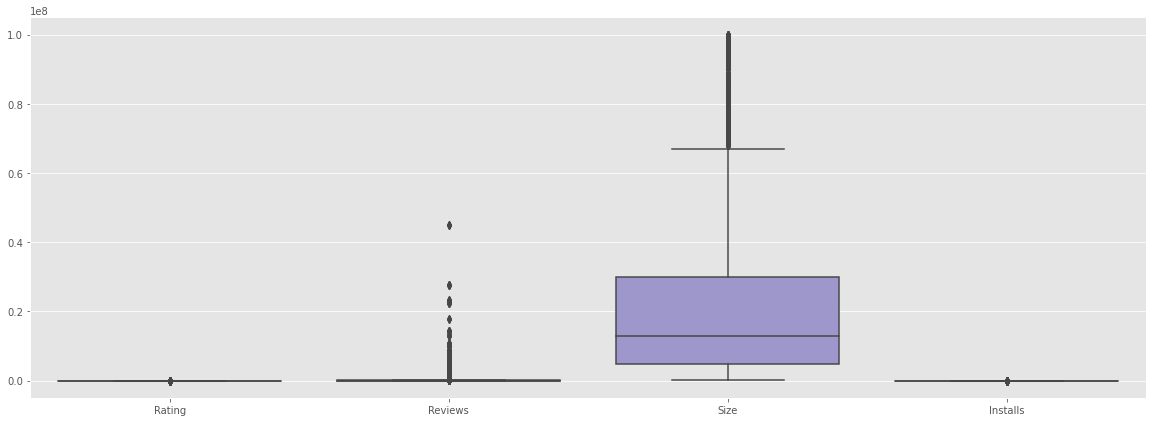

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [ ]:
df.corr() # Checking the correlation before using dummy Data

,Rating,Reviews,Size,Installs
Rating,1.000000,0.068608,0.054812,0.006894
Reviews,0.068608,1.000000,0.238215,-0.014125
Size,0.054812,0.238215,1.000000,-0.002370
Installs,0.006894,-0.014125,-0.002370,1.000000


Text(0.5, 1.0, 'Rating VS Installs with outlier Apps')

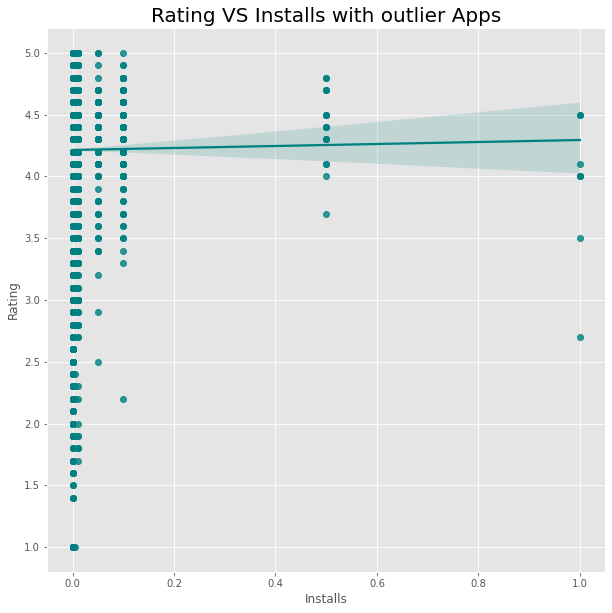

In [ ]:
# Correlation between Ratings and installs.

plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df);
plt.title('Rating VS Installs with outlier Apps',size = 20)

# Findins from below chart - Higher the rating higher the number of Installs

Text(0.5, 1.0, 'Rating VS Installs without outliers apps')

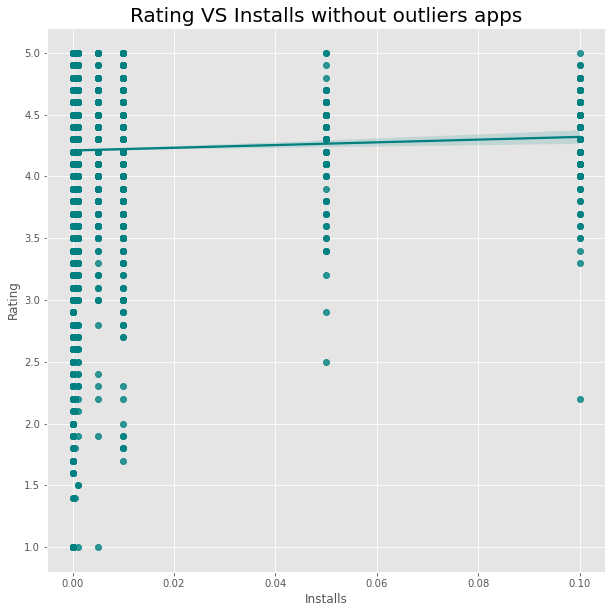

In [ ]:
# Correlation between Ratings and installs.

plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df[df['Installs']<0.5]);
plt.title('Rating VS Installs without outliers apps',size = 20)

# Findins from below chart - Higher the rating higher the number of Installs

In [ ]:
# By this we can understand that Installs are directly dependent on Ratings. If people see high Ratings the higher will be the number of installs.
# Installs being a dependent variable on Ratings.
# Ratings and reviews are the predictor variable from above two charts.
# Note - Outlier are removed from above charts.
# range of the predictor variable "Ratings" is 4-4.7. if the Ratings is in this range then the installs will be higher.
# Number of installs Range increases with Outliers. And Range decreases without outliers.

In [ ]:
# Here Feature selection has been Done and Three main variable are used to predict the Model i.e. Ratings, reviews and Size od the apps are used to predict number of installs.
from sklearn.model_selection import  train_test_split

X = df[['Reviews', 'Size', 'Rating',]]

y = df['Installs']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

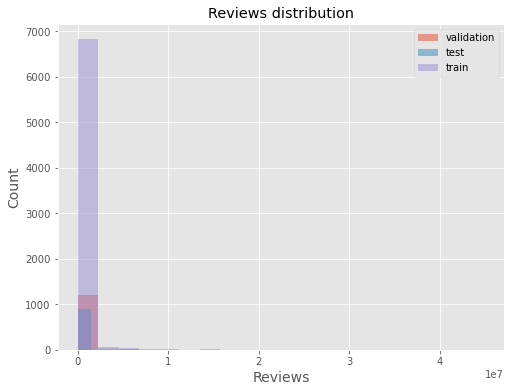

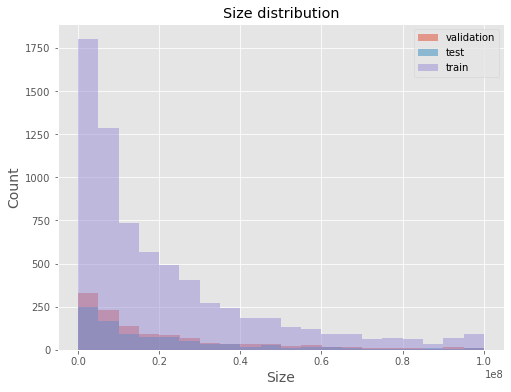

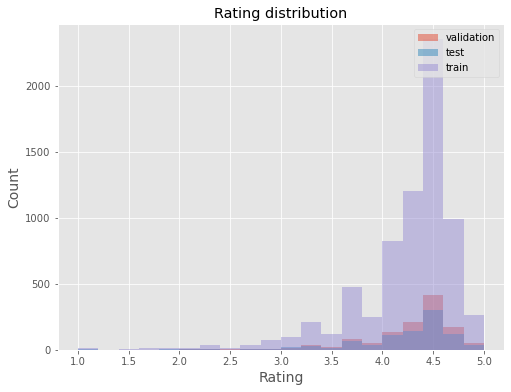

In [ ]:
X_test_plot = X_test[['Reviews', 'Size', 'Rating',]]

X_val_plot = X_val[['Reviews', 'Size', 'Rating',]]

X_train_plot = X_train[['Reviews', 'Size', 'Rating',]]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
# Test and validation Data are matching with each other

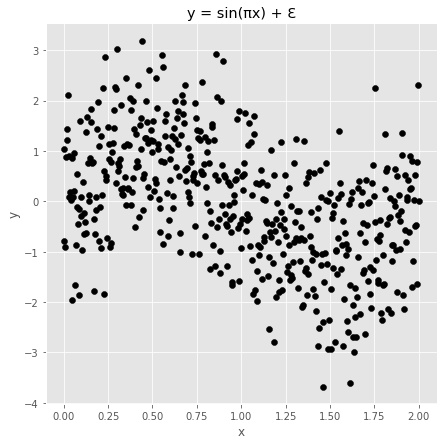

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# for reproducibility across different runs, one may set a seed as follows:
# np.random.seed(42)

# number of observations
NUM_OBS = 500

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

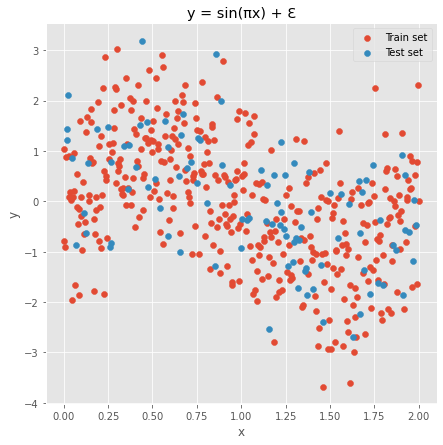

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

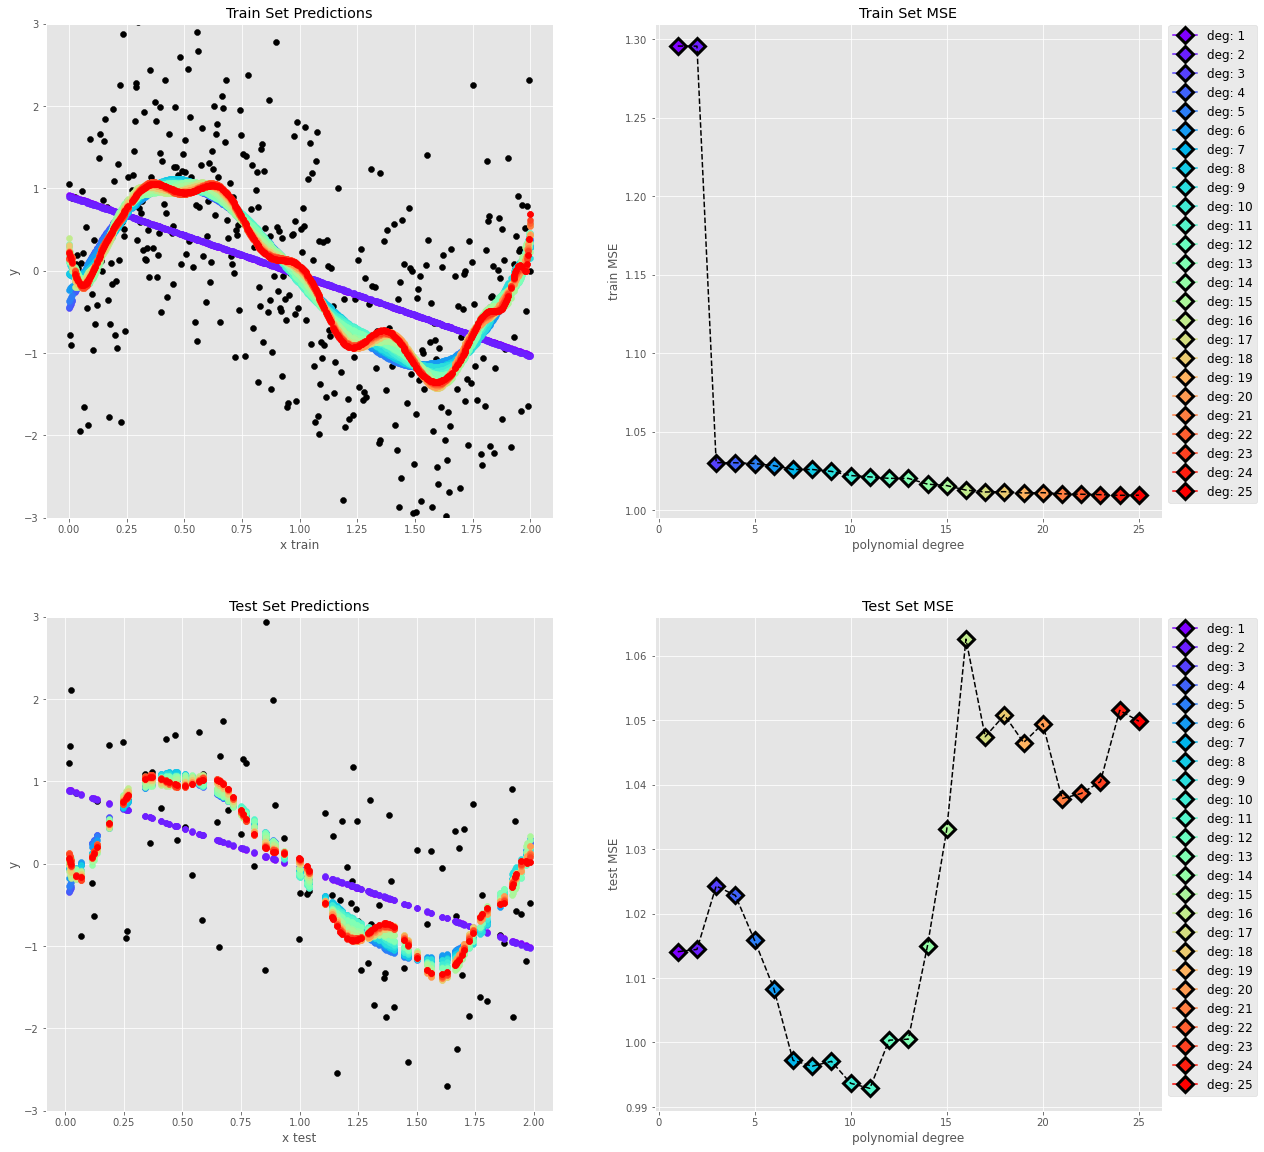

In [ ]:
NUM_MODELS = 25

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):

  c = next(colors)

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # plot train and test k-th degree polynomial fit
  axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
  axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

  # train and test MSE of k-th degree polynomial fit 
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # plot train and test MSE of k-th degree polynomial fit
  axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
  axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})

In [ ]:
def train_test_accuracy(Classifier,X_train,y_train,X_test,y_test):
    
    #Train Model Fitting
    Classifier.fit(X_train,y_train)
    pred_train = Classifier.predict(X_train)
    
    #Train Accuracy
    train_acc = accuracy_score(y_train, pred_train, normalize=True) * float(100)
    
    #Test Accuracy
    pred_test = Classifier.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)
    
    #Printing train and test accuracy
    print('\n****Train accuracy = %f%%' % (train_acc))
    print('\n****Test accuracy =  %f%%' % (test_acc))
    
    #plotting Confusion matrix
    plot_cm_rates(y_test,pred_test)

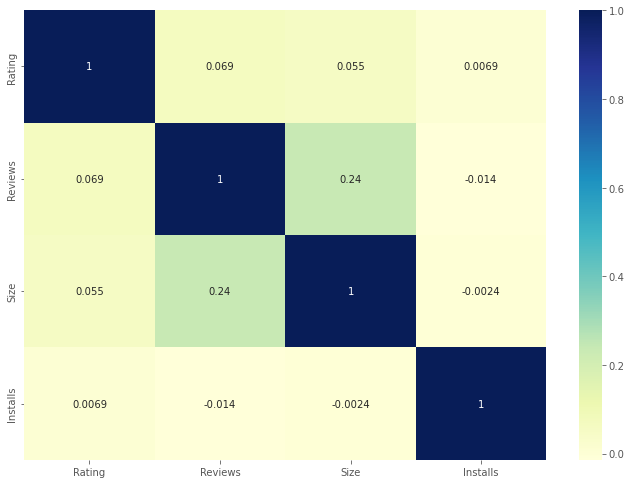

In [ ]:
#Performing feature selection using correleation matrix heatmap
#Plotting heat map to see the correlation and check for any possibility of redundant columns
sns.heatmap(df .corr(), annot=True, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
# The division of dataset in Test, train and validation sets looks fine.

# Question - Which independent variables are useful to predict a target (dependent variable)?

# *Answer - Ratings and Reviews are independent variable usefull to predict Number of installs

# Question - Which independent variable have missing data? How much? 

# *Answer - Rating had 1474 missing data

# Question - Do the training and test sets have the same data?

# *Answer - yes! Training and test set have same data

# Question - In the predictor variables independent of all the other predictor variables?

# *Answer - Ratings and Reviews are corelated.

# Question - Which predictor variables are the most important?

# *Answer - Ratings and Number of reviews are the most important predictor variable to predict Number of Installs.
    
# Question - Do the ranges of the predictor variables make sense?

# *Answer - Yes the Range of the predictor Variable Makes sense. if the Rating is between 4-4.7 then the number of Installs are high.

# Question - What are the distributions of the predictor variables? 

# *Answer - Normal distribution left Skewed for rating Variable. 90% of the ratings are between 3.5-4.5

# Content refered
# https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
# Notebook Kaggle